# Lineaire Regressie in Python
## 1.2 Normal Equation

In [1]:
import pandas as pd
wijnen = pd.read_csv('winequality-red.csv', delimiter=';')

In [2]:
wijnen.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Lineaire Regressie en de Normal Equation

Recap: om lineaire regressie toe te passen proberen we een functie te fitten, waarbij $\widehat{y}$ de geschatte waarde voor de te verklaren variabele is (ook wel de afhankelijke variabele of target variabele genoemd), $x$ de verklarende variabele en $\theta$ de coefficienten van de gefitte lijn:

$$ 
\widehat{y} = \theta_1 * x + \theta_0
$$

Meest standaard is om voor het bepalen van de coefficienten een least squares kostenfunctie $J$ te minimaliseren, waarbij $y$ de te verklaren variabele is. In deze notatie gebruiken we $^{(i)}$ met ronde haakjes om een trainingspaar $(x^{(i)}, y^{(i)})$ aan te kunnen duiden, oftewel de $i$-de customer in de set met trainings data:

$$ J(\theta) = \sum_i (\widehat{y^{(i)}} - y^{(i)})^2  = \sum_i \theta_1 * x^{(i)} + \theta_0 - y^{(i)} $$

Het gebruikelijk/makkelijker om de formules te herschrijven in vector notatie. Daarvoor wordt aan de input vector $x$ een waarde $x_0$ toe te voegen met de constante waarde 1, we noemen dat ook wel een bias. $\theta$ bevat beide coefficienten, zodat het product $\theta^Tx = \theta_0 + \theta_1 * x_1$:

$$ x = \left[ \begin{matrix} x_0 \\ x_1 \end{matrix} \right], \theta = \left[ \begin{matrix} \theta_0 \\ \theta_1 \end{matrix} \right]$$

zodat de oorsponkelijke formules voor $\widehat{y}$ en $J(\theta)$ kunnen dan worden herschreven als:

$$ \widehat{y} = \theta_1 * x + \theta_0  = \theta^T \cdot x $$

$$ J(\theta) = \sum_i \theta_1 * x^{(i)} + \theta_0 - y^{(i)} = \sum_i \theta^T \cdot x_i - y^{(i)} $$


Voor een makkelijker implementatie kunnen we het sommatie symbool vervangen door een matrix vermenervuldiging. We stellen daarvoor een matrix $X$ samen met de input samples $x^{(i)^T}$ als rowvectors. De kostenfunctie kan dan worden herschreven als:

$$ J(\theta) = \sum_i \theta^T \cdot x_i - y^{(i)} = (X \cdot \theta - y)^T \cdot (X \cdot \theta - y) $$ 

Een van de manieren om de coefficienten van de functie $\theta$ te leren is door de afgeleide van de kostenfunctie gelijk te stellen aan 0 (ook wel de Normal Equation genoemd):

$$ \frac{\delta J(\theta)}{\delta \theta} = 2X^TX\theta - X^Ty = 0 $$

$$ \theta = (X^TX)^{-1} \cdot X^Ty $$

#### Voorbeeld regressie

We gaan een regressielijn fitten die `quality` verklaart vanuit het percentage `alcohol`. Laten we eerst kijken hoe de data eruit ziet.

In [3]:
wijnen.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [4]:
wijnen.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wijnen.alcohol.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

#### Data punten tonen in een Scatter Plot

We kunnen nu met Pandas eenvoudig de datapunten op een X en Y as afbeelden. Omdat quality alleen hele getallen kan aannemen, worden er veel punten over elkaar gezet. Door aan `plot.scatter` de parameter `s=1` mee te geven worden de punten kleiner en kunnen we iets beter zien hoe de data eruit ziet. 

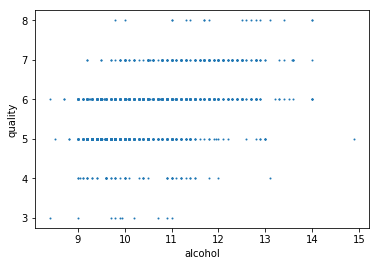

In [6]:
%matplotlib inline
wijnen.plot.scatter(x='alcohol', y='quality', s=1)

In de scatterplot zien we een zwakke correlatie tussen alcohol en quality, namelijk dat hogere alcohol percentages samen gaan met betere kwaliteit. Op basis van de visualisatie verwachten we dat alcohol alleen maar een matige voorspeller oplevert, maar wel met een positieve bijdrage.

We gaan nu de data prepareren, we willen een trainings matrix $X$ samenstellen met een bias $x_0 = 1$ en $x_1$ die het alcohol percentage bevat. Eerst voegen we aan het Dataframe een bias kolom toe.

In [7]:
wijnen['bias'] = 1

Voor matrix berekeningen maken we gebruik van de Python library **numpy**. Numpy maakt het eenvoudig om transposes en inverses te maken. We kunnen met de methode `as_matrix` een DataFrame van Pandas omzetten naar een numpy matrix.

In [8]:
X = wijnen[['bias', 'alcohol']].as_matrix()
X

array([[  1. ,   9.4],
       [  1. ,   9.8],
       [  1. ,   9.8],
       ..., 
       [  1. ,  11. ],
       [  1. ,  10.2],
       [  1. ,  11. ]])

In [9]:
y = wijnen.quality.as_matrix()
y

array([5, 5, 5, ..., 6, 5, 6])

$$ \theta = (X^TX)^{-1} \cdot X^TY $$

We kunnen dan vrij eenvoudig met de Normal Equation de coefficienten van een lineaire regressielijn fitten die geminimaliseerd is naar kleinste kwadraten. Een korte toelichting bij onderstaande code:

- `X.T`: de transpose van $X$
- `np.dot`: dot product tussen twee matrices
- `np.linalg.pinv()`: de pseudo-inverse van een matrix. De inverse van een matrix is niet altijd te bepalen (determinant=0) en levert niet altijd numeriek stabiele resultaten op. Daarom wordt de inverse vaak vervangen door de pseudo-inverse van een matrix te berekenen omdat deze betrouwbaarder om te gebruiken.

In [10]:
import numpy as np
XtX = np.dot(X.T, X)
XtX_inv = np.linalg.pinv(XtX)
Xty = np.dot(X.T, y)
theta = np.dot(XtX_inv, Xty)

$\theta$ bevat dan de coefficienten van de regressielijn $\widehat{y} = \theta_1 \cdot x + \theta_0$. Met andere woorden, $\theta_0$ is het snijpunt met de y-as en $\theta_1$ de richtingscoefficient.

In [11]:
theta

array([ 1.87497489,  0.36084177])

We kunnen het resultaat visualiseren met de library Matplotlib:

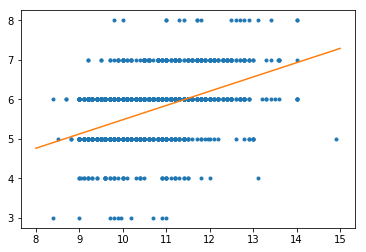

In [12]:
import matplotlib.pyplot as plt
plt.plot(wijnen.alcohol, wijnen.quality, '.')
line_x=np.array([8,15])
line_y=line_x * theta[1] + theta[0]
plt.plot(line_x, line_y, '-')

Visueel ziet het resultaat er misschien niet uit als een optimale fit, maar zoals we hieronder laten zien komt dat door de scheven verdeling in `quality`; het overgrote deel van de wijnen scoort een 5 of een 6. 

In [13]:
wijnen.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64